In [1]:
%matplotlib inline

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
import seaborn as sns

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

Here read data from file and set first column for index

In [3]:
coffee_data = pd.read_csv('data/merged_data_cleaned.csv', index_col=0)

### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

With shape give the measure on Data Frame

In [4]:
coffee_data.shape

(1339, 43)

**Now get all columns name**

In [5]:
coffee_data.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

**With .dtype** get type on each column

In [6]:
coffee_data.dtypes

Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.Points         float64
Moisture  

**.describe** five common statistic measure on number comlumns *have to attention with categories variables*

In [7]:
coffee_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Bags,1339.0,154.182972,129.987162,0.0,14.00,175.00,275.00,1062.00
Aroma,1339.0,7.566706,0.377560,0.0,7.42,7.58,7.75,8.75
Flavor,1339.0,7.520426,0.398442,0.0,7.33,7.58,7.75,8.83
Aftertaste,1339.0,7.401083,0.404463,0.0,7.25,7.42,7.58,8.67
Acidity,1339.0,7.535706,0.379827,0.0,7.33,7.58,7.75,8.75
Body,1339.0,7.517498,0.370064,0.0,7.33,7.50,7.67,8.58
Balance,1339.0,7.518013,0.408943,0.0,7.33,7.50,7.75,8.75
Uniformity,1339.0,9.834877,0.554591,0.0,10.00,10.00,10.00,10.00
Clean.Cup,1339.0,9.835108,0.763946,0.0,10.00,10.00,10.00,10.00
Sweetness,1339.0,9.856692,0.616102,0.0,10.00,10.00,10.00,10.00


In [8]:
coffee_data.nunique(dropna=False).sort_values()

Species                    2
unit_of_measurement        2
Color                      4
Processing.Method          6
Uniformity                10
Clean.Cup                 11
Quakers                   12
Sweetness                 17
Category.One.Defects      18
Moisture                  23
Certification.Body        26
In.Country.Partner        27
Certification.Contact     29
Variety                   30
Acidity                   31
Certification.Address     32
Balance                   33
Body                      33
Aroma                     33
Flavor                    35
Aftertaste                35
Country.of.Origin         37
Category.Two.Defects      38
Cupper.Points             42
Harvest.Year              47
Bag.Weight                56
Number.of.Bags           131
Total.Cup.Points         180
altitude_high_meters     199
altitude_low_meters      199
altitude_mean_meters     212
Lot.Number               228
Company                  282
Owner                    316
Owner.1       

### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

Using reges about to change columns names on snake_case

In [9]:
coffee_data.columns = coffee_data.columns.str.lower().str.replace(r'[. ]', '_', regex=True)

In [10]:
coffee_data.columns

Index(['species', 'owner', 'country_of_origin', 'farm_name', 'lot_number',
       'mill', 'ico_number', 'company', 'altitude', 'region', 'producer',
       'number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year',
       'grading_date', 'owner_1', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

First we check what values have at column bag_weight and see it have number plus space plus kind unit of measurment. With methods split and value _counts we see how many kind unit of measurement have including NaN

In [11]:
coffee_data.bag_weight.str.split(' ', n=1, expand=True, )[1].value_counts(dropna=False)

1
kg        1196
lbs        114
None        27
kg,lbs       2
Name: count, dtype: int64

Now we going to add two columns in the Data Frame coffee_data first value of measurment and unit of measurment. Nest set value of measurment as number

In [12]:
coffee_data[['values_of_measurement_bag', 'unit_of_measurement_bag']] = coffee_data.bag_weight.str.split(' ', n=1, expand=True)
coffee_data.values_of_measurement_bag = coffee_data.values_of_measurement_bag.astype(float)

As we now unit_of_measurment can be kg, lbs, both or none. We'll get min, max and meam value for evry type value to understand both and none which type are.

In [13]:
coffee_data.groupby('unit_of_measurement_bag', dropna=False)['values_of_measurement_bag'].agg(['min', 'max', 'mean'])

,min,max,mean
unit_of_measurement_bag,,,
kg,0.0,19200.0,197.505017
"kg,lbs",1.0,2.0,1.500000
lbs,0.0,150.0,58.043860
NaN,1.0,6.0,4.555556


How to see in coffee_data have other column named unit_of_measurement, but next check, which is show botton two sell, we can see it is unit for high - foot and meter

In [14]:
coffee_data[['unit_of_measurement_bag', 'unit_of_measurement']]

,unit_of_measurement_bag,unit_of_measurement
0,kg,m
1,kg,m
2,None,m
3,kg,m
4,kg,m
...,...,...
1334,kg,m
1335,kg,m
1336,kg,m
1337,lbs,m


In [15]:
coffee_data.unit_of_measurement.value_counts(dropna=False)

unit_of_measurement
m     1157
ft     182
Name: count, dtype: int64

Now we are trying understen what measur are with NaN nad kg,lbs in unit_of_measurement_bag. For this propose we'll filter only this rows.

In [16]:
coffee_data[(coffee_data.unit_of_measurement_bag == 'kg,lbs') | coffee_data.unit_of_measurement_bag.isnull()][['number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year', 'values_of_measurement_bag', 'unit_of_measurement_bag']]

,number_of_bags,bag_weight,in_country_partner,harvest_year,values_of_measurement_bag,unit_of_measurement_bag
2,5,1,Specialty Coffee Association,NaN,1.0,None
13,1,1,Specialty Coffee Association,Sept 2009 - April 2010,1.0,None
16,1,"2 kg,lbs",Specialty Coffee Association,May-August,2.0,"kg,lbs"
17,150,6,Ethiopia Commodity Exchange,2009/2010,6.0,None
26,150,6,Ethiopia Commodity Exchange,2009/2010,6.0,None
30,275,6,Specialty Coffee Association,NaN,6.0,None
38,300,6,Ethiopia Commodity Exchange,2009/2010,6.0,None
50,300,6,Ethiopia Commodity Exchange,2009/2010,6.0,None
51,1,2,Specialty Coffee Association,Fall 2009,2.0,None
74,2,"1 kg,lbs",Specialty Coffee Association,2009 / 2010,1.0,"kg,lbs"


In next cell we'll calculate total coffee weight as multiply column values_of_measurement_bag with column number_of_bags. Next we'll use groupby for calsum of each kinid unit_of_measurement_bag, including None value, and get cer cent on each type per all sum.

In [17]:
filtered_data = coffee_data
filtered_data.loc[:, 'all_coffee_weight'] = filtered_data.values_of_measurement_bag * filtered_data.number_of_bags
groupby_unit_of_measurement_bag = filtered_data.groupby('unit_of_measurement_bag', dropna=False)['all_coffee_weight'].sum()
(groupby_unit_of_measurement_bag/groupby_unit_of_measurement_bag.sum()) * 100

unit_of_measurement_bag
kg        99.703388
kg,lbs     0.000007
lbs        0.248937
NaN        0.047668
Name: all_coffee_weight, dtype: float64

How to see from the upper one code, per cent on NaN and kg are less then 0,05% from all sum. In this case for as much as don't understand what are unit measure for NaN and kg,lbs, we'll for kg. That can be wrong assumption, but the influence of that is too low and it is better then delete all rows with NaN or kg,lbs in column unit_of_measurement_bag.

Next we'll transform every measurt in kg and column bag_weight will have wwight of bag in kg and type int. For tis purpose can lbs transform in kg as lbs multipy with 0.453592

In [18]:
def transform_lbs_in_kg(row):
    if row['unit_of_measurement_bag'] == 'lbs':
        return row['values_of_measurement_bag'] * 0.453592
    return row['values_of_measurement_bag']

coffee_data['bag_weight'] = coffee_data.apply(transform_lbs_in_kg, axis=1)
coffee_data.columns

Index(['species', 'owner', 'country_of_origin', 'farm_name', 'lot_number',
       'mill', 'ico_number', 'company', 'altitude', 'region', 'producer',
       'number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year',
       'grading_date', 'owner_1', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters',
       'values_of_measurement_bag', 'unit_of_measurement_bag',
       'all_coffee_weight'],
      dtype='object')

Now we'll delete last three columns in coffee_data which had created for doing with bag_weight and now they aren't usfull 

In [19]:
coffee_data = coffee_data.iloc[:, : -3]

### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

First, for columns 'garing_data' and 'expiration' we'll check with isna and value_counts for NaN values. Next with the metod to_datatime() we'll chenge the type of columns as for this purpose with next regex expretion ((\d+)(st|nd|rd|th) will remove the suffixes on the dates.  

In [20]:
coffee_data.grading_date.isna().value_counts(), coffee_data.expiration.isna().value_counts()

(grading_date
 False    1339
 Name: count, dtype: int64,
 expiration
 False    1339
 Name: count, dtype: int64)

In [21]:
coffee_data.grading_date = pd.to_datetime(coffee_data.grading_date.str.strip().str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True))

In [22]:
coffee_data.expiration = pd.to_datetime(coffee_data.expiration.str.strip().str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True))

After changed 'garing_data' and 'expiration' next chack in 'harvest_data' how many None cell there are.
After that chacked 'harvest_date' how many cells there are which don't detain for digits as year without None value.

In [23]:
coffee_data.harvest_year.isna().value_counts()

harvest_year
False    1292
True       47
Name: count, dtype: int64

In [24]:
coffee_data[['harvest_year', 'grading_date', 'expiration']].dropna()[~coffee_data.harvest_year.str.contains(r'\d{4}', na=False, regex=True)]

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_15132\3952127158.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  coffee_data[['harvest_year', 'grading_date', 'expiration']].dropna()[~coffee_data.harvest_year.str.contains(r'\d{4}', na=False, regex=True)]


,harvest_year,grading_date,expiration
16,May-August,2010-05-31,2011-05-31
169,mmm,2011-03-23,2012-03-22
170,TEST,2011-03-22,2012-03-21
312,4T/10,2011-02-09,2012-02-09
395,January Through April,2010-05-26,2011-05-26
477,August to December,2010-06-16,2011-06-16
492,Mayo a Julio,2011-07-29,2012-07-28
527,Abril - Julio,2011-05-12,2012-05-11
631,4T/10,2011-02-09,2012-02-09
776,4T/10,2011-02-09,2012-02-09


How to seen above, 'harvest_date' detain 47 None value and 16 without four digits as year.
In next sells woll be created two Data Frame with columns 'harvest_year', 'grading_date', 'expiration', as in column 'harviest_data will be got only four digits as year. Where have more than one sequence in first Data Fram got last sequence and in second get first sequence. 
Then will be substract the 'harvest_data' value from 'grading_date' and 'expiration' in bouth Data Frame and will be counted how many diffrent substracr have and for each substract how many counts. Thish is made with purpose to understood had an addiction between 'harvest_date' and 'grading_date', 'expiration' and in case that had to be fill None values in 'haverst_date.

In [25]:
farvest_gradiing_expiration_date = coffee_data[['harvest_year', 'grading_date', 'expiration']].dropna(subset=['harvest_year'])
farvest_gradiing_expiration_date.harvest_year = farvest_gradiing_expiration_date.harvest_year.str.findall(r'\d{4}').apply(lambda x: x[-1] if isinstance(x, list) and x else None).dropna().astype(int)
farvest_gradiing_expiration_date.dtypes

harvest_year           float64
grading_date    datetime64[ns]
expiration      datetime64[ns]
dtype: object

In [26]:
(farvest_gradiing_expiration_date.grading_date.dt.year - farvest_gradiing_expiration_date.harvest_year).value_counts(), (farvest_gradiing_expiration_date.expiration.dt.year - farvest_gradiing_expiration_date.harvest_year).value_counts()

( 0.0       858
  1.0       310
 -1.0        99
  2.0         8
 -5190.0      1
 Name: count, dtype: int64,
  1.0       858
  2.0       310
  0.0        99
  3.0         8
 -5189.0      1
 Name: count, dtype: int64)

In [27]:
farvest_gradiing_expiration_date_get_firs_year = coffee_data[['harvest_year', 'grading_date', 'expiration']].dropna(subset=['harvest_year'])
farvest_gradiing_expiration_date_get_firs_year.harvest_year = farvest_gradiing_expiration_date_get_firs_year.harvest_year.str.findall(r'\d{4}').apply(lambda x: x[0] if isinstance(x, list) and x else None).dropna().astype(int,)
farvest_gradiing_expiration_date_get_firs_year.dtypes

harvest_year           float64
grading_date    datetime64[ns]
expiration      datetime64[ns]
dtype: object

In [28]:
(farvest_gradiing_expiration_date_get_firs_year.grading_date.dt.year - farvest_gradiing_expiration_date_get_firs_year.harvest_year).value_counts(), (farvest_gradiing_expiration_date_get_firs_year.expiration.dt.year - farvest_gradiing_expiration_date_get_firs_year.harvest_year).value_counts()

( 0.0       924
  1.0       340
  2.0         9
 -1.0         2
 -5190.0      1
 Name: count, dtype: int64,
  1.0       924
  2.0       340
  3.0         9
  0.0         2
 -5189.0      1
 Name: count, dtype: int64)

In [29]:
farvest_gradiing_expiration_date[(farvest_gradiing_expiration_date.grading_date.dt.year - farvest_gradiing_expiration_date.harvest_year) == -5190]

,harvest_year,grading_date,expiration
948,7201.0,2011-02-22,2012-02-22


As can be seen if get last year for havest date have 99 rows where grading_date will be with one year before, wich didn't very logical. On other hend with first years, have only two cases when grading date is before. For that for will be chosen the first year for havest date. And in most cases the year of 'harvest_year' and 'grading_date' are same, None values in harvest_date will be filled with the year of grading_date.
Also have owe year in harvest_date with value 7201, this is nosense and this value will be changed as grading_date.

In [30]:
coffee_data.loc[coffee_data.harvest_year.str.contains(r'7201', na=False), 'harvest_year'] = np.nan

In [39]:
coffee_data.harvest_year = coffee_data.harvest_year.str.findall(r'\d{4}').apply(lambda x: x[0] if isinstance(x, list) and x else None)
coffee_data.harvest_year = coffee_data.apply(lambda row: row.grading_date.year if pd.isna(row.harvest_year) else row.harvest_year, axis=1).astype(int)

In [40]:
coffee_data.harvest_year.value_counts()

harvest_year
2012    354
2014    252
2013    210
2015    157
2016    135
2017     91
2011     70
2010     45
2009     20
2018      5
Name: count, dtype: int64

### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

With value_counts checked each country and how many counts there are it. And next cell shows one value with None. There are three diffrent written for three parts of the USA - 'United States (Hawaii)', 'United States (Puerto Rico)' and 'United States'. For as much as each record for the USA stared with United States, for now don't change this records.
As regards None value - will be chech in the other columns whether have got information which can use for 'country_of_origin'

In [43]:
coffee_data.country_of_origin.value_counts(dropna=False)

country_of_origin
Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         32
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
India                            14
Malawi                           11
United States                    10
Peru                             10
Myanmar                           8
Vietnam                           8
Haiti                             6
Philippines                       5
United States (Puerto Rico)       4
Panama                            4
Ecuador   

In [50]:
coffee_data[['ico_number', 'owner', 'owner_1', 'country_of_origin', 'farm_name', 'company', 'region', 'producer', 'producer', 'in_country_partner', 'number_of_bags', 'bag_weight']].sort_values(by='country_of_origin', na_position='last').tail(10)

,ico_number,owner,owner_1,country_of_origin,farm_name,company,region,producer,producer,in_country_partner,number_of_bags,bag_weight
1338,NaN,cafe politico,Cafe Politico,Vietnam,NaN,cafe politico,NaN,NaN,NaN,Specialty Coffee Association,1,2.26796
860,NaN,"sunvirtue co., ltd.","Sunvirtue Co., Ltd.",Vietnam,apollo estate,"sunvirtue co., ltd.",vietnam,Richard Yeh,Richard Yeh,Specialty Coffee Association,1,2.00000
502,NaN,"sunvirtue co., ltd.","Sunvirtue Co., Ltd.",Vietnam,apollo estate,"sunvirtue co., ltd.",vietnam cau dat,"Yeh, Li Chuan.","Yeh, Li Chuan.",Specialty Coffee Association,2,2.00000
1105,NaN,"sunvirtue co., ltd.","Sunvirtue Co., Ltd.",Vietnam,apollo estate,"sunvirtue co., ltd.",dala,"Yeh, Li Chuan","Yeh, Li Chuan",Specialty Coffee Association,1,2.00000
790,NaN,royal base corporation,Royal Base Corporation,Vietnam,"apollo co., ltd.",royal base corporation,don duong,"Apollo Co., LTd.","Apollo Co., LTd.",Specialty Coffee Association,1,2.00000
554,NaN,royal base corporation,Royal Base Corporation,Vietnam,"apollo co., ltd.",royal base corporation,don duong,"Apollo Co., Ltd.","Apollo Co., Ltd.",Specialty Coffee Association,1,2.00000
564,NaN,"sunvirtue co., ltd.","Sunvirtue Co., Ltd.",Vietnam,apollo estate,"sunvirtue co., ltd.",vietnam tutra,"Yeh, Li Chuan","Yeh, Li Chuan",Specialty Coffee Association,3,2.00000
444,NaN,"sunvirtue co., ltd.","Sunvirtue Co., Ltd.",Vietnam,apollo estate,"sunvirtue co., ltd.",dala,"Yeh, Li Chuan","Yeh, Li Chuan",Specialty Coffee Association,1,2.00000
823,-,lusso lab,LUSSO LAB,Zambia,mubuyu munali,lusso coffee lab,mubuyu estate,NaN,NaN,Specialty Coffee Association,13,2.00000
1197,3-37-1980,racafe & cia s.c.a,Racafe & Cia S.C.A,NaN,NaN,NaN,NaN,NaN,NaN,Almacafé,149,70.00000


In [52]:
coffee_data[coffee_data.owner == 'racafe & cia s.c.a'].head(5)

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
97,Arabica,racafe & cia s.c.a,Colombia,NaN,3-37-1829,bachue,3-37-1829,racafe & cia s.c.a,NaN,huila,...,Green,3,2018-02-15,Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
106,Arabica,racafe & cia s.c.a,Colombia,NaN,3-37-0277,bachue,3-37-0277,racafe & cia s.c.a,NaN,huila,...,NaN,2,2017-11-25,Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
107,Arabica,racafe & cia s.c.a,Colombia,NaN,NaN,NaN,3-37-4824,racafe & cia s.c.a,de 1600 a 1950 msnm,huila,...,Green,1,2016-10-25,Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1600.0,1950.0,1775.0
110,Arabica,racafe & cia s.c.a,Colombia,NaN,NaN,NaN,3-37-0416,racafe & cia s.c.a,de 1600 a 1950 msnm,huila,...,Green,3,2013-12-11,Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1600.0,1950.0,1775.0
145,Arabica,racafe & cia s.c.a,Colombia,NaN,3-37-1724,bucaramanga,3-37-1724,racafe & cia s.c.a,1500,santander,...,Blue-Green,4,2018-01-10,Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1500.0,1500.0,1500.0


How to seen above sells 'owner' 'racafe & cia s.c.a' have 43 records and with exeption the record that country_of_origin is None with the others country_of_origin is Columbia, therefore None value have to replace with Columbia in the record with country_of_origin None. Since know colunm and index used iloc[]

In [57]:
coffee_data.iloc[1197, 2] = 'Colombia'

### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

In cell 50 from Notebook can be seen owner is normalizedet (only low leter). Will be cheched that by comparing owner and lower owner_1 and metods strip and replace on space with none for both columns. If this is true both columns are the same ans owner_1 will be deleted

In [66]:
coffee_data[['owner', 'owner_1']][coffee_data.owner.str.strip().str.replace(' ', '', regex=False) != coffee_data.owner_1.str.lower().str.strip().str.replace(' ', '', regex=False)]

,owner,owner_1
364,NaN,NaN
392,federacion nacional de cafeteros,Federación Nacional de Cafeteros
459,NaN,NaN
602,NaN,NaN
848,NaN,NaN
882,NaN,NaN
975,NaN,NaN
1044,NaN,NaN


How can be seen next implement operations, hove few difference as all except are NaN value and the record that have differece at name the difference is one letter whoch in the one column is with English symbol 'o' but in the other is with 'o' with `. Now column owner_1 will be deleted.


In [67]:
coffee_data = coffee_data.drop(columns=['owner_1'])

In [68]:
coffee_data.columns

Index(['species', 'owner', 'country_of_origin', 'farm_name', 'lot_number',
       'mill', 'ico_number', 'company', 'altitude', 'region', 'producer',
       'number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year',
       'grading_date', 'variety', 'processing_method', 'aroma', 'flavor',
       'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup',
       'sweetness', 'cupper_points', 'total_cup_points', 'moisture',
       'category_one_defects', 'quakers', 'color', 'category_two_defects',
       'expiration', 'certification_body', 'certification_address',
       'certification_contact', 'unit_of_measurement', 'altitude_low_meters',
       'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

In [93]:
coffee_data.groupby(['country_of_origin', 'color']).size().unstack()

color,Blue-Green,Bluish-Green,Green
country_of_origin,,,
Brazil,14.0,12.0,92.0
Burundi,NaN,NaN,1.0
China,NaN,NaN,16.0
Colombia,8.0,8.0,118.0
Costa Rica,10.0,9.0,28.0
Cote d?Ivoire,NaN,1.0,NaN
Ecuador,2.0,1.0,NaN
El Salvador,2.0,2.0,9.0
Ethiopia,NaN,2.0,15.0


### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

In [97]:
feachers_for_analize = ['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points', 'moisture']
coffee_data[featurs_for_analize].describe().T

,count,mean,std,min,25%,50%,75%,max
aroma,1339.0,7.566706,0.377560,0.0,7.42,7.58,7.75,8.75
flavor,1339.0,7.520426,0.398442,0.0,7.33,7.58,7.75,8.83
aftertaste,1339.0,7.401083,0.404463,0.0,7.25,7.42,7.58,8.67
acidity,1339.0,7.535706,0.379827,0.0,7.33,7.58,7.75,8.75
body,1339.0,7.517498,0.370064,0.0,7.33,7.50,7.67,8.58
balance,1339.0,7.518013,0.408943,0.0,7.33,7.50,7.75,8.75
uniformity,1339.0,9.834877,0.554591,0.0,10.00,10.00,10.00,10.00
clean_cup,1339.0,9.835108,0.763946,0.0,10.00,10.00,10.00,10.00
sweetness,1339.0,9.856692,0.616102,0.0,10.00,10.00,10.00,10.00
cupper_points,1339.0,7.503376,0.473464,0.0,7.25,7.50,7.75,10.00


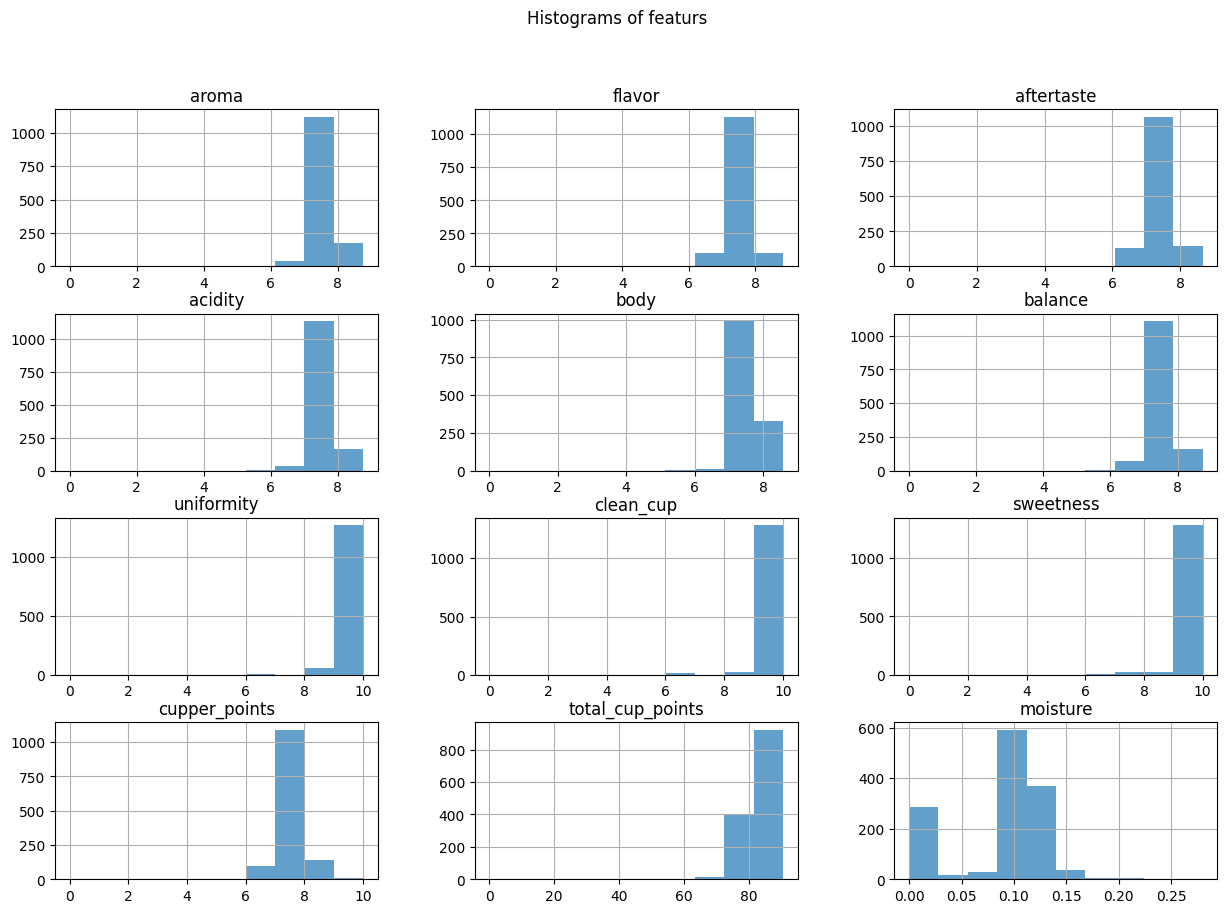

In [103]:
coffee_data[feachers_for_analize].hist(bins=10, figsize=(15, 10), alpha=0.7)
plt.suptitle('Histograms of featurs')
plt.show()

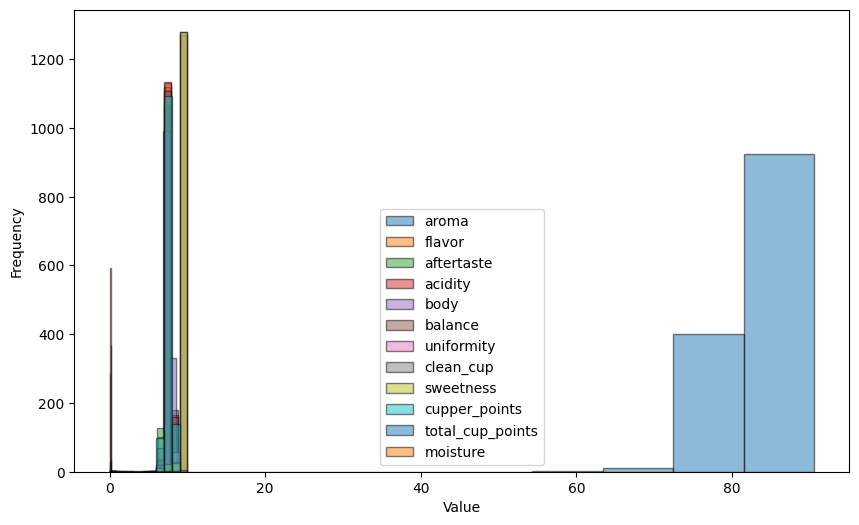

In [116]:
plt.figure(figsize=(10, 6))

for feature in feachers_for_analize:
    plt.hist(coffee_data[feature], bins=10, alpha=0.5, label=feature, edgecolor='black')

plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

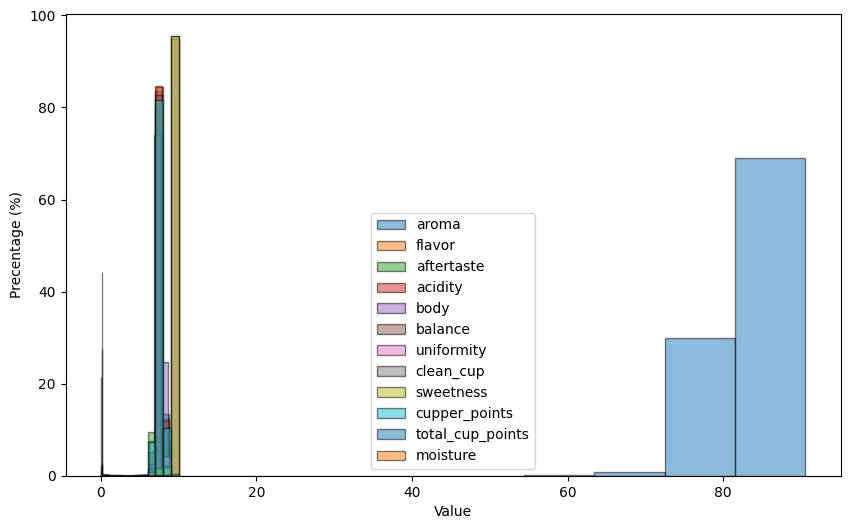

In [128]:
plt.figure(figsize=(10, 6))

for feature in feachers_for_analize:
    plt.hist(coffee_data[feature], bins=10, alpha=0.5, label=feature, edgecolor='black', weights=[100 / len(coffee_data)] * len(coffee_data))

plt.legend()
plt.xlabel('Value')
plt.ylabel('Precentage (%)')
plt.show()

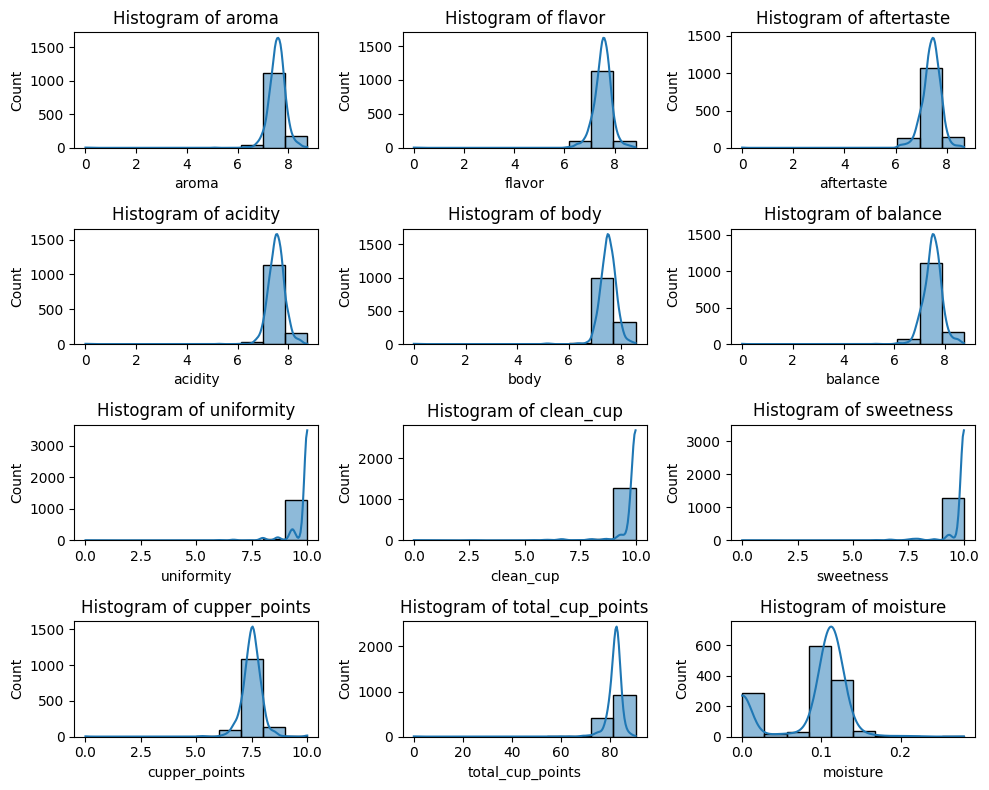

In [109]:
rows = 4
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(10, 8))

axes = axes.flatten()

for i, feature in enumerate(feachers_for_analize):
    sns.histplot(coffee_data[feature], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

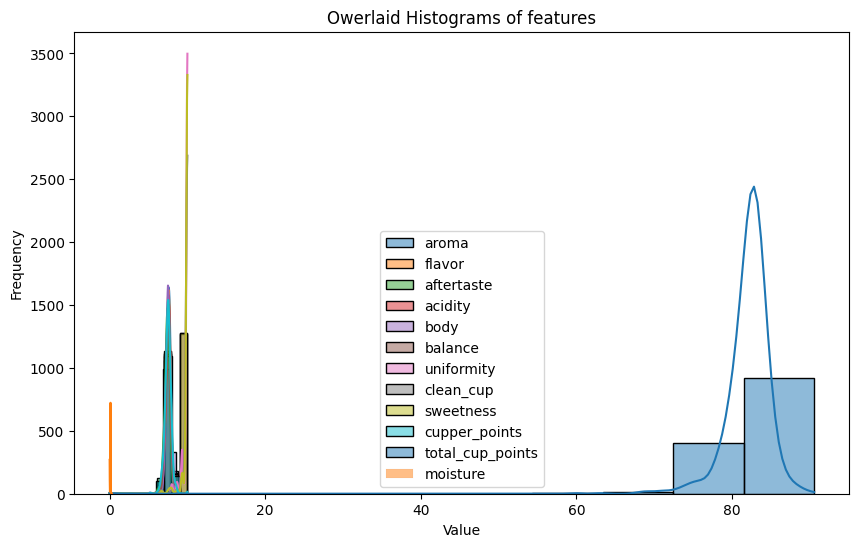

In [113]:
plt.figure(figsize=(10, 6))

for feature in feachers_for_analize:
    sns.histplot(coffee_data[feature], bins=10, kde=True, label=feature, alpha=0.5)

plt.legend()
plt.title('Owerlaid Histograms of features')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_15132\163522014.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([coffee_data[feature] for feature in feachers_for_analize], labels=feachers_for_analize, patch_artist=True)


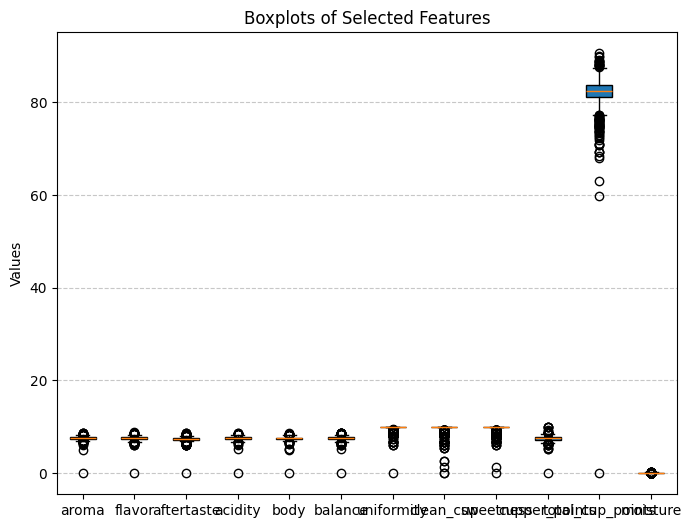

In [127]:
plt.figure(figsize=(8, 6))
plt.boxplot([coffee_data[feature] for feature in feachers_for_analize], labels=feachers_for_analize, patch_artist=True)

plt.title("Boxplots of Selected Features")
plt.ylabel("Values")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

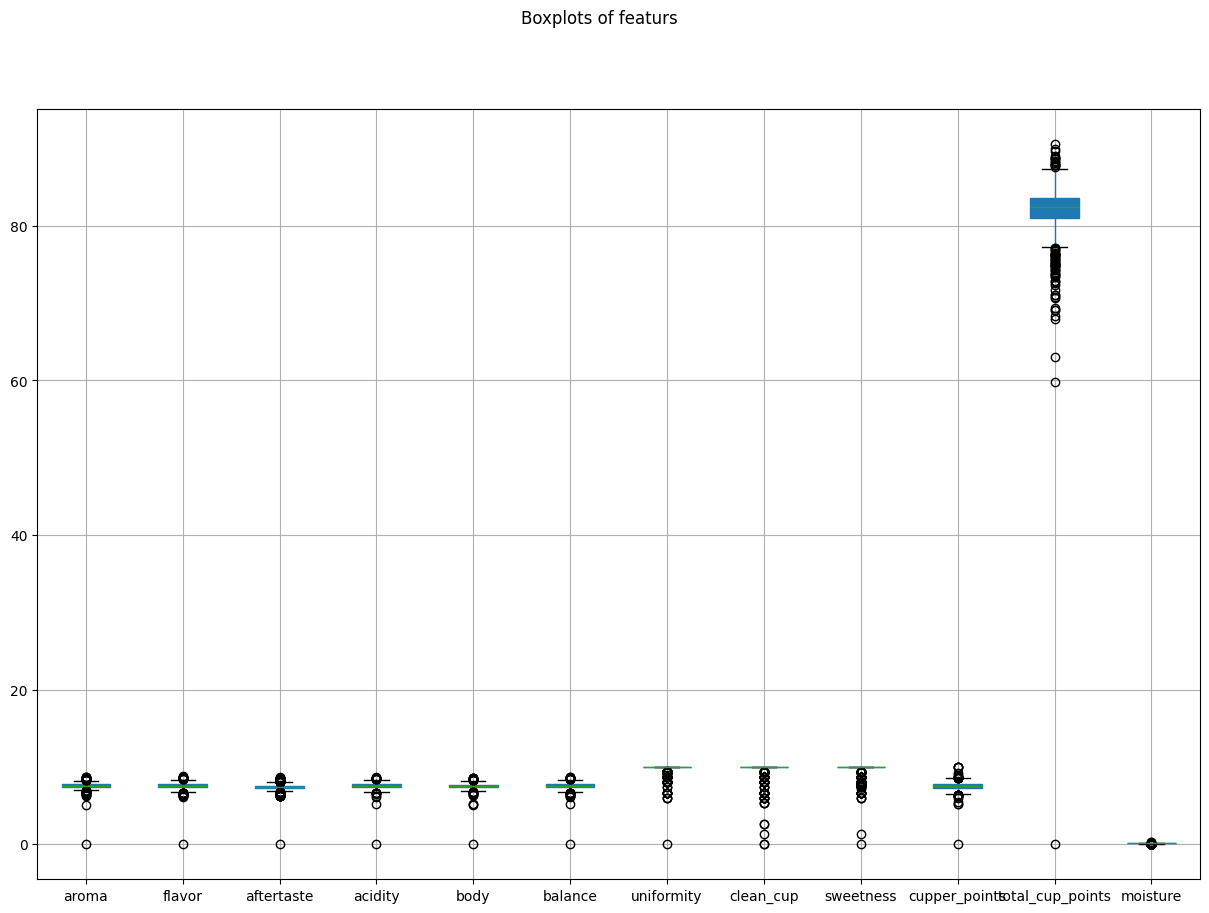

In [134]:
coffee_data[feachers_for_analize].boxplot(figsize=(15, 10), patch_artist=True)
plt.suptitle('Boxplots of featurs')
plt.show()

### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

For this problem first will be used metod groupby that collect by region and count unique countries each region with metod nunique. Then will be check menual each region which is more 1 countris.

In [152]:
(coffee_data.groupby('region')['country_of_origin'].nunique()[coffee_data.groupby('region')['country_of_origin'].nunique() > 1])

region
antioquia      2
chikmagalur    2
jalapa         2
menglian       2
occidental     2
san marcos     2
Name: country_of_origin, dtype: int64

In [158]:
coffee_data.country_of_origin[coffee_data.region == 'san marcos']

210     Guatemala
376     Guatemala
458      Honduras
460     Guatemala
560     Guatemala
580     Guatemala
675     Guatemala
676     Guatemala
811     Guatemala
859     Guatemala
871     Guatemala
935     Guatemala
958      Honduras
1005     Honduras
1140    Guatemala
1192    Guatemala
Name: country_of_origin, dtype: object

Have two region which are in two countris but in one by them theran't same region. Region Chikmagalur is only in India and in the USA its hasn't and Menglian than exist only in China but not in Mexico.
New will be check 'owner' and 'farm_name' with purpose to understood which is really country or region for this records.

In [159]:
coffee_data[['farm_name', 'owner', 'country_of_origin', 'region']][coffee_data.region == 'chikmagalur']

,farm_name,owner,country_of_origin,region
1313,sethuraman estate,andrew hetzel,India,chikmagalur
1316,NaN,andrew hetzel,India,chikmagalur
1317,sethuraman estates,andrew hetzel,India,chikmagalur
1323,sethuraman estates,andrew hetzel,India,chikmagalur
1326,sethuraman estate,andrew hetzel,India,chikmagalur
1327,sethuraman estates,andrew hetzel,India,chikmagalur
1331,sethuraman estates,andrew hetzel,India,chikmagalur
1332,sethuraman estates,andrew hetzel,India,chikmagalur
1333,sethuraman estates,andrew hetzel,United States,chikmagalur


In [160]:
coffee_data[['farm_name', 'owner', 'country_of_origin', 'region']][coffee_data.region == 'menglian']

,farm_name,owner,country_of_origin,region
591,pu'er lingdu yunlin coffee co.ltd,yunnan coffee exchange,China,menglian
1280,la cruz,"grupo juvenil magtayani, ac",Mexico,menglian


In [167]:
coffee_data[['farm_name', 'owner', 'country_of_origin', 'region', 'number_of_bags', 'bag_weight']][coffee_data.farm_name == 'la cruz']

,farm_name,owner,country_of_origin,region,number_of_bags,bag_weight
1280,la cruz,"grupo juvenil magtayani, ac",Mexico,menglian,43,1.0


Above sells can be seen about region Menglian is error at the United States as country_of _origin because as farm is sethuraman estates and as owner is andrew hetzel the other them records as country is India and this value in this sel will be change on India.
For another rong country didn't understand what is real region since this is the only record about farm and owner. From farm name - la cruz, may to guess the country is Mexico but there have quet a few regions. This record is only 1 kg bag-weight and 43 bag count, which is to small. 

In [171]:
coffee_data.iloc[1333,2] = 'India'

In [184]:
#coffee_data.groupby('country_of_origin')['altitude'].agg(['min', 'max', 'mean'])
coffee_data.altitude[~(coffee_data.altitude.astype(str).str.strip().str.isdigit())].dropna()

0           1950-2200
1           1950-2200
2       1600 - 1800 m
3           1800-2200
4           1950-2200
            ...      
1327             750m
1331             750m
1332             750m
1333            3000'
1336       795 meters
Name: altitude, Length: 472, dtype: object

In [200]:
#farvest_gradiing_expiration_date = coffee_data[['harvest_year', 'grading_date', 'expiration']].dropna(subset=['harvest_year'])
#farvest_gradiing_expiration_date.harvest_year = farvest_gradiing_expiration_date.harvest_year.str.findall(r'\d{4}').apply(lambda x: x[-1] if isinstance(x, list) and x else None).dropna().astype(int)
#farvest_gradiing_expiration_date.dtypes
coffee_data.altitude[
    coffee_data.altitude.dropna().astype(str)
    .str.findall(r'\d+')
    .apply(lambda x: x if isinstance(x, list) and len(x) > 1 else None)
    .dropna().index
]


0           1950-2200
1           1950-2200
2       1600 - 1800 m
3           1800-2200
4           1950-2200
            ...      
1256        400-1250m
1259    900-1500 masl
1297       640m-1400m
1315        1200-1300
1320         900-1300
Name: altitude, Length: 176, dtype: object

In [211]:
coffee_data['altitude_min'] = coffee_data.altitude.dropna().astype(str).str.findall(r'\d+').apply(lambda x: x[0] if isinstance(x, list) and x else None).astype('Int64')
coffee_data['altitude_max'] = coffee_data.altitude.dropna().astype(str).str.findall(r'\d+').apply(lambda x: x[-1] if isinstance(x, list) and x else None).astype('Int64')


In [214]:
coffee_data = coffee_data.drop(columns='altitude')

In [218]:
coffee_data[['altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters', 'altitude_min', 'altitude_max']].isna().sum()

altitude_low_meters     230
altitude_high_meters    230
altitude_mean_meters    230
altitude_min            229
altitude_max            229
dtype: int64

In [220]:
coffee_data[['altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters', 'altitude_min', 'altitude_max']].applymap(type).nunique()

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_15132\1155407246.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coffee_data[['altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters', 'altitude_min', 'altitude_max']].applymap(type).nunique()


altitude_low_meters     1
altitude_high_meters    1
altitude_mean_meters    1
altitude_min            2
altitude_max            2
dtype: int64

In [224]:
coffee_data[['altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters', 'altitude_min', 'altitude_max']][(coffee_data.altitude_high_meters.isna()) & (coffee_data.altitude_max.notna())]


,altitude_low_meters,altitude_high_meters,altitude_mean_meters,altitude_min,altitude_max
986,NaN,NaN,NaN,0,0


In [232]:
coffee_data.altitude_max.dropna().value_counts().sort_index(ascending=False)

altitude_max
190164     1
11000      1
6200       1
6100       1
6000       3
          ..
8          1
3          2
2          2
1         12
0          2
Name: count, Length: 196, dtype: Int64

In [247]:
coffee_data[['country_of_origin', 'region', 'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters', 'altitude_min', 'altitude_max']][coffee_data.altitude_max > 3000]

,country_of_origin,region,altitude_low_meters,altitude_high_meters,altitude_mean_meters,altitude_min,altitude_max
57,Guatemala,acatenango,1524.00,1524.000,1524.000,5000,5000
58,Guatemala,nuevo oriente,1417.32,1417.320,1417.320,4650,4650
69,Guatemala,huehuetenango,1706.88,1755.648,1731.264,5600,5760
105,Guatemala,"chuva, san marcos",1066.80,1584.960,1325.880,3500,5200
138,Guatemala,oriente,1310.64,1310.640,1310.640,4300,4300
...,...,...,...,...,...,...,...
1274,Guatemala,oriente,1310.64,1310.640,1310.640,4300,4300
1287,Guatemala,oriente,1310.64,1310.640,1310.640,4300,4300
1309,Guatemala,nuevo oriente,1417.32,1417.320,1417.320,4650,4650
1312,India,chikmagalur karnataka indua,3170.00,3170.000,3170.000,3170,3170


### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!

In [248]:
# sinsinel value
coffee_data.acidity.fillna(-999)

0       8.75
1       8.58
2       8.42
3       8.42
4       8.50
        ... 
1334    7.58
1335    7.75
1336    7.42
1337    7.17
1338    6.83
Name: acidity, Length: 1339, dtype: float64

In [249]:
# imputation
coffee_data.acidity.fillna(coffee_data.acidity.mean())

0       8.75
1       8.58
2       8.42
3       8.42
4       8.50
        ... 
1334    7.58
1335    7.75
1336    7.42
1337    7.17
1338    6.83
Name: acidity, Length: 1339, dtype: float64

Средно се взема, когато има тясно разпределение. При бимодално разпределение се взема може да се вземе средна стойност само на едната част от извадката, която отговаря на , т.е. взема се филтрирано средно.

In [250]:
pd.qcut(coffee_data.balance, 5)

0         (7.75, 8.75]
1         (7.75, 8.75]
2         (7.75, 8.75]
3         (7.75, 8.75]
4         (7.75, 8.75]
             ...      
1334      (7.75, 8.75]
1335    (-0.001, 7.25]
1336    (-0.001, 7.25]
1337    (-0.001, 7.25]
1338    (-0.001, 7.25]
Name: balance, Length: 1339, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 7.25] < (7.25, 7.5] < (7.5, 7.58] < (7.58, 7.75] < (7.75, 8.75]]

pd.qcut - разпределя множеството на в посочение бинове, като всеки бин има равен брой елементи и показва какви са граничните стойности на биновите.

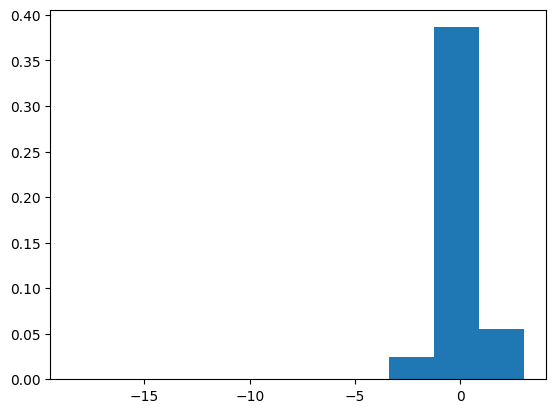

In [254]:
plt.hist((coffee_data.balance - coffee_data.balance.mean()) / coffee_data.balance.std(), density=True) # Така се взема z- score
plt.show()

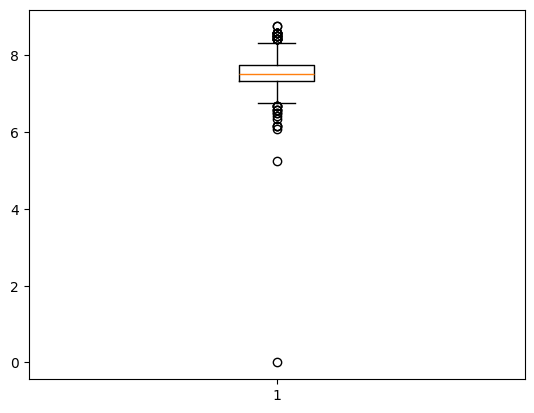

In [253]:
plt.boxplot(coffee_data.balance) # изплзва се намиране на outliers
plt.show()